# Q1 - 2

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import keras
from keras.models import load_model
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

Using TensorFlow backend.


In [4]:
attdata = pd.read_csv('att.csv',delim_whitespace = True)

In [5]:
comm = pd.read_csv('communities.data',names = attdata['attributes'])

In [6]:
print(comm.shape)

(1994, 128)


In [7]:
comm.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [8]:
comm = comm.drop(columns = ['state','county','community','communityname','fold'], axis = 1)

In [9]:
from pandas import DataFrame
comm = comm.replace('?',np.nan)
feat_miss = comm.columns[comm.isnull().any()]

In [10]:
comm = comm.dropna(axis=1)
print(comm.shape)
# commdata.head()

(1994, 100)


In [11]:
# x = commdata.iloc[:,0:100].values
# y = commdata.iloc[:,100].values

from sklearn.model_selection import train_test_split

Xtrain,Xtest = train_test_split(comm,test_size = 0.3)


In [12]:
print(Xtest.columns)

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
       'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
       'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig',
       'PctRecImmig5', 'PctRecImmig8', 'PctRec

In [13]:
Ytrain = Xtrain.pop("ViolentCrimesPerPop")
Ytest = Xtest.pop("ViolentCrimesPerPop")
print(Ytrain)
print()
print(Ytest)

80      0.30
254     0.04
1098    0.19
1113    0.13
1497    0.12
        ... 
970     0.69
47      0.12
1050    0.13
627     0.01
1658    0.05
Name: ViolentCrimesPerPop, Length: 1395, dtype: float64

639     0.18
1156    0.29
1741    0.06
1311    0.06
865     0.04
        ... 
960     0.26
110     0.56
155     0.44
515     0.03
962     0.01
Name: ViolentCrimesPerPop, Length: 599, dtype: float64


In [14]:
# Normalizing

#Xtrain,Xtest,Ytrain,Ytest

x_mean = Xtrain.mean(axis=0)
Xtrain -= x_mean
x_std = Xtrain.std(axis=0)
Xtrain /=x_std
Xtest -= x_mean
Xtest /= x_std


In [40]:
from keras import models
from keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(90, activation='relu',input_shape=(Xtrain.shape[1],)))
    model.add(layers.Dropout(0.8))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(90,activation='relu'))
    model.add(layers.Dropout(0.8))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model


In [47]:
k = 6
num_val = len(Xtrain)//k
all_hist = []
for i in range(k):
    print('processing fold #',i)
    val_data = Xtrain[i*num_val:(i+1)*num_val]
    val_target = Ytrain[i*num_val:(i+1)*num_val]
    
    partial_data = np.concatenate([Xtrain[:i*num_val],Xtrain[(i+1)*num_val:]],axis = 0)
    partial_target = np.concatenate([Ytrain[:i*num_val],Ytrain[(i+1)*num_val:]],axis = 0)
    model = build_model()
    history = model.fit(partial_data,partial_target,epochs=100,batch_size=20,verbose = 1,validation_data=(val_data,val_target))
    model.save("file2.h5")
    mae_hist = history.history['val_mae']
    all_hist.append(mae_hist)

processing fold # 0
Train on 1163 samples, validate on 232 samples
Epoch 1/100
1163/1163 [==============================] - 0s 304us/step - loss: 1.4228 - mae: 0.9383 - val_loss: 0.1891 - val_mae: 0.3142
Epoch 2/100
1163/1163 [==============================] - 0s 69us/step - loss: 0.9619 - mae: 0.7711 - val_loss: 0.0686 - val_mae: 0.1963
Epoch 3/100
1163/1163 [==============================] - 0s 63us/step - loss: 0.6644 - mae: 0.6453 - val_loss: 0.0453 - val_mae: 0.1722
Epoch 4/100
1163/1163 [==============================] - 0s 60us/step - loss: 0.3738 - mae: 0.4867 - val_loss: 0.0391 - val_mae: 0.1617
Epoch 5/100
1163/1163 [==============================] - 0s 67us/step - loss: 0.2008 - mae: 0.3557 - val_loss: 0.0345 - val_mae: 0.1452
Epoch 6/100
1163/1163 [==============================] - 0s 59us/step - loss: 0.1242 - mae: 0.2745 - val_loss: 0.0349 - val_mae: 0.1426
Epoch 7/100
1163/1163 [==============================] - 0s 61us/step - loss: 0.0723 - mae: 0.2053 - val_loss: 0.033

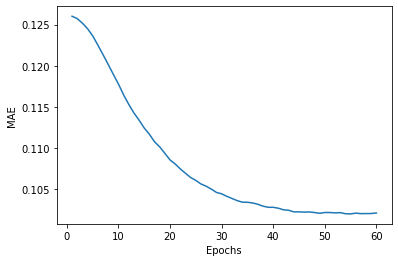

In [52]:
avg_ame_hist = [np.mean([x[i] for x in all_hist]) for i in range(70)]
def smoothcurve(pnt,factor=0.9):
    smoothed_pnt = []
    for j in pnt:
        if smoothed_pnt:
            previous = smoothed_pnt[-1]
            smoothed_pnt.append(previous * factor + j * (1-factor))
        else:
            smoothed_pnt.append(j)
    return smoothed_pnt

smoothmae_hist = smoothcurve(avg_ame_hist[10:])

plt.plot(range(1,len(smoothmae_hist) + 1),smoothmae_hist)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [53]:
test_mse,test_mae = model.evaluate(Xtest,Ytest)
var = load_model("file2.h5")
result =var.evaluate(Xtest,Ytest)
print(test_mae)

599/599 [==============================] - 0s 77us/step
0.10245712846517563
